In [15]:
import pickle

theospecs = pickle.load(open('../data/train/theospec.pkl', 'rb'))
# print(test.keys())

In [16]:
import csv
reader = csv.reader(theospecs)
for i, line in enumerate(reader):
    print(line)
    if (i > 10):
        break

['R.IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK.F']
['F.NESTIIDEKPTSIDNNSMN+0.984C+57.021PGPKLEKPGEEYSIEVSLNK.G']
['F.EDSQNKLGAEMVINTSGKYGYKSTFC+57.021SQDIMGPNILQNLK.P']
['F.NESTIIDEKPTSIDNNSMNC+57.021PGPKLEKPGEEYSIEVSLN+0.984K.G']
['K.TSESGELHGLTTEEEFVEGIYKVEIDTKSYWK.A']
['P.QMNFLEADYVEMQ+0.984GSTKNLIGVFHRC+57.021LTNC+57.021K.L']
['K.TGASHLKELFQ+0.984EDTPSTMEC+57.021VSDSLQRRHTSR.K']
['I.DELKEQVDAALGAEEM+15.995VEMLTDRNLNLEEKVR.E']
['K.KVLGAFSDGLAHLDNLKGTFATLSELHC+57.021DKLHVDPENFR.L']
['Q.FSNLTQ+0.984HKRIHTGEKPYKC+57.021KEC+57.021GKAFNKFSSLTQHR.R']
['Q.FSNLTQHKRIHTGEKPYKC+57.021KEC+57.021GKAFN+0.984KFSSLTQHR.R']
['R.+43.006LYGKLDGLPC+57.021FEMVLLYPTVEAC+57.021QALC+57.021QLLNSHKLAR.Y']


In [20]:
print(theospecs['R.IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK.F'].keys())
# print(theospecs['R.IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK.F']['mz_arr'])
# print(theospecs['R.IGYPDDIVSNDNKLNNEYLELNYKEDEYFENIIQNLK.F']['intensity_arr'])

dict_keys(['mz_arr', 'charge_arr', 'ion_name_arr', 'intensity_arr'])


In [18]:
# Get a random spectrum from spectrum data
# Use it as mz,intensity actual
# Get it's scan num
# Get peptide matches from meta data
# For each of these peptides, get their theo spec
# Compare each's theo spec plot against the actual

from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy
import matplotlib.pyplot as plt
import numpy as np

meta = pickle.load(open('../data/train/meta.pkl', 'rb'))
train_spectrums = pickle.load(open('../data/train/spectrum.pkl', 'rb'))

2023-05-26 16:19:09,685:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-26 16:19:09,686:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


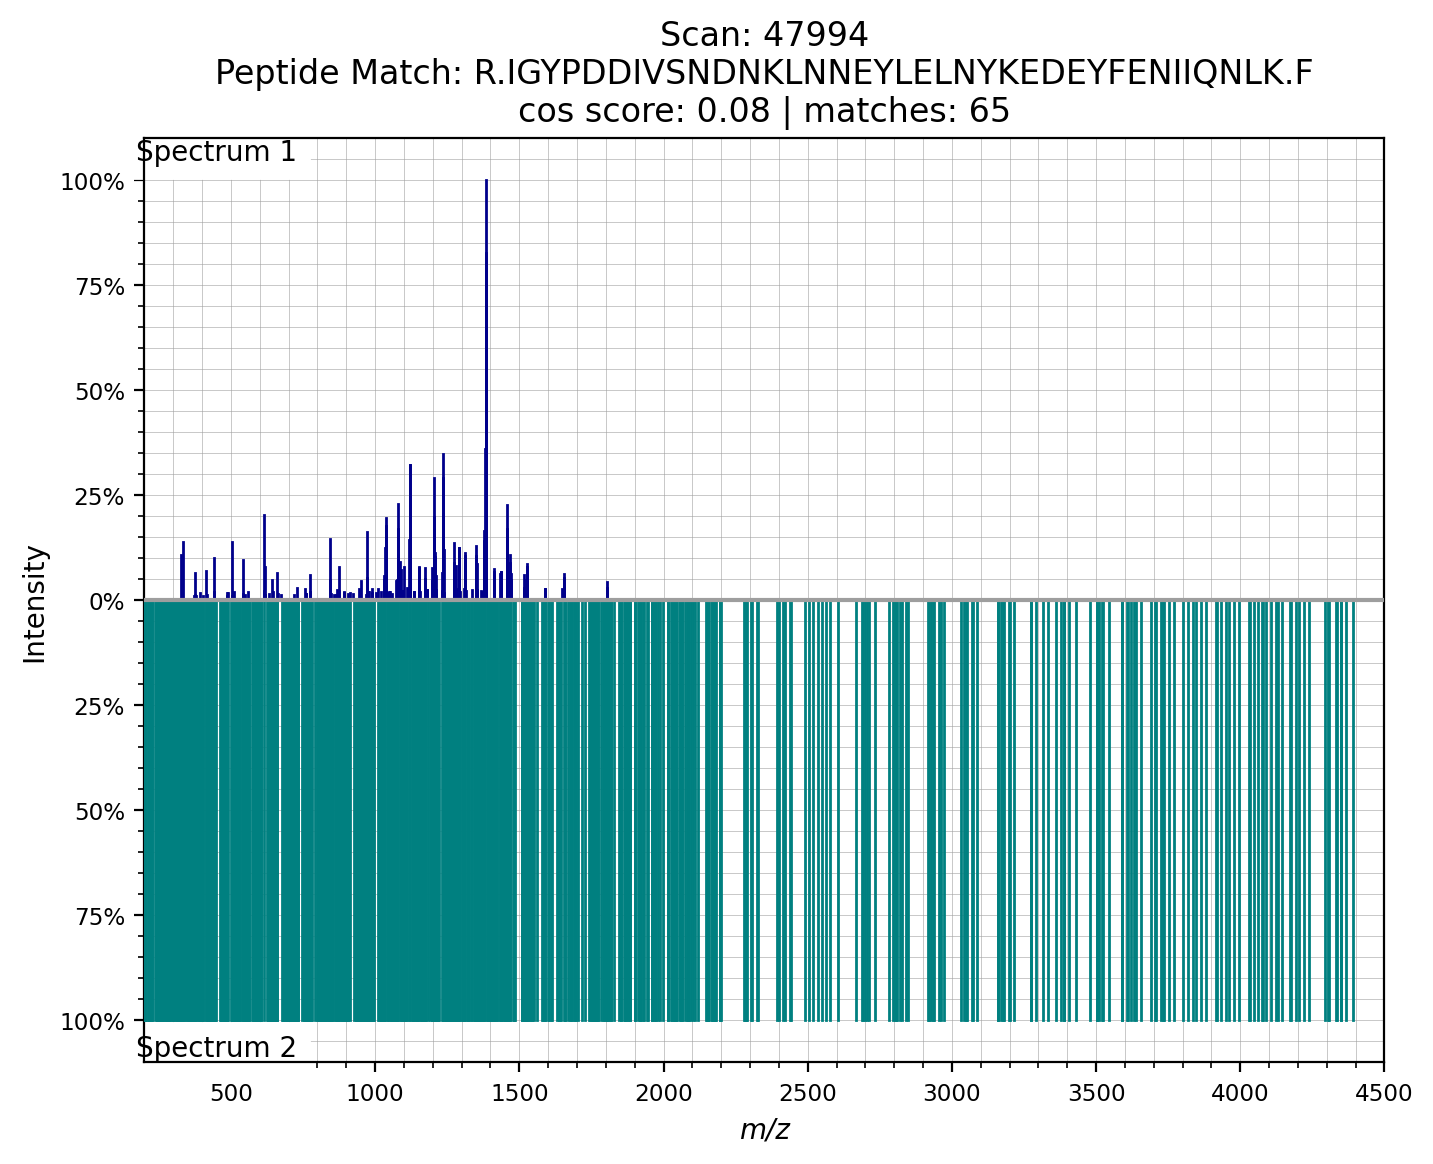

2023-05-26 16:19:10,081:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


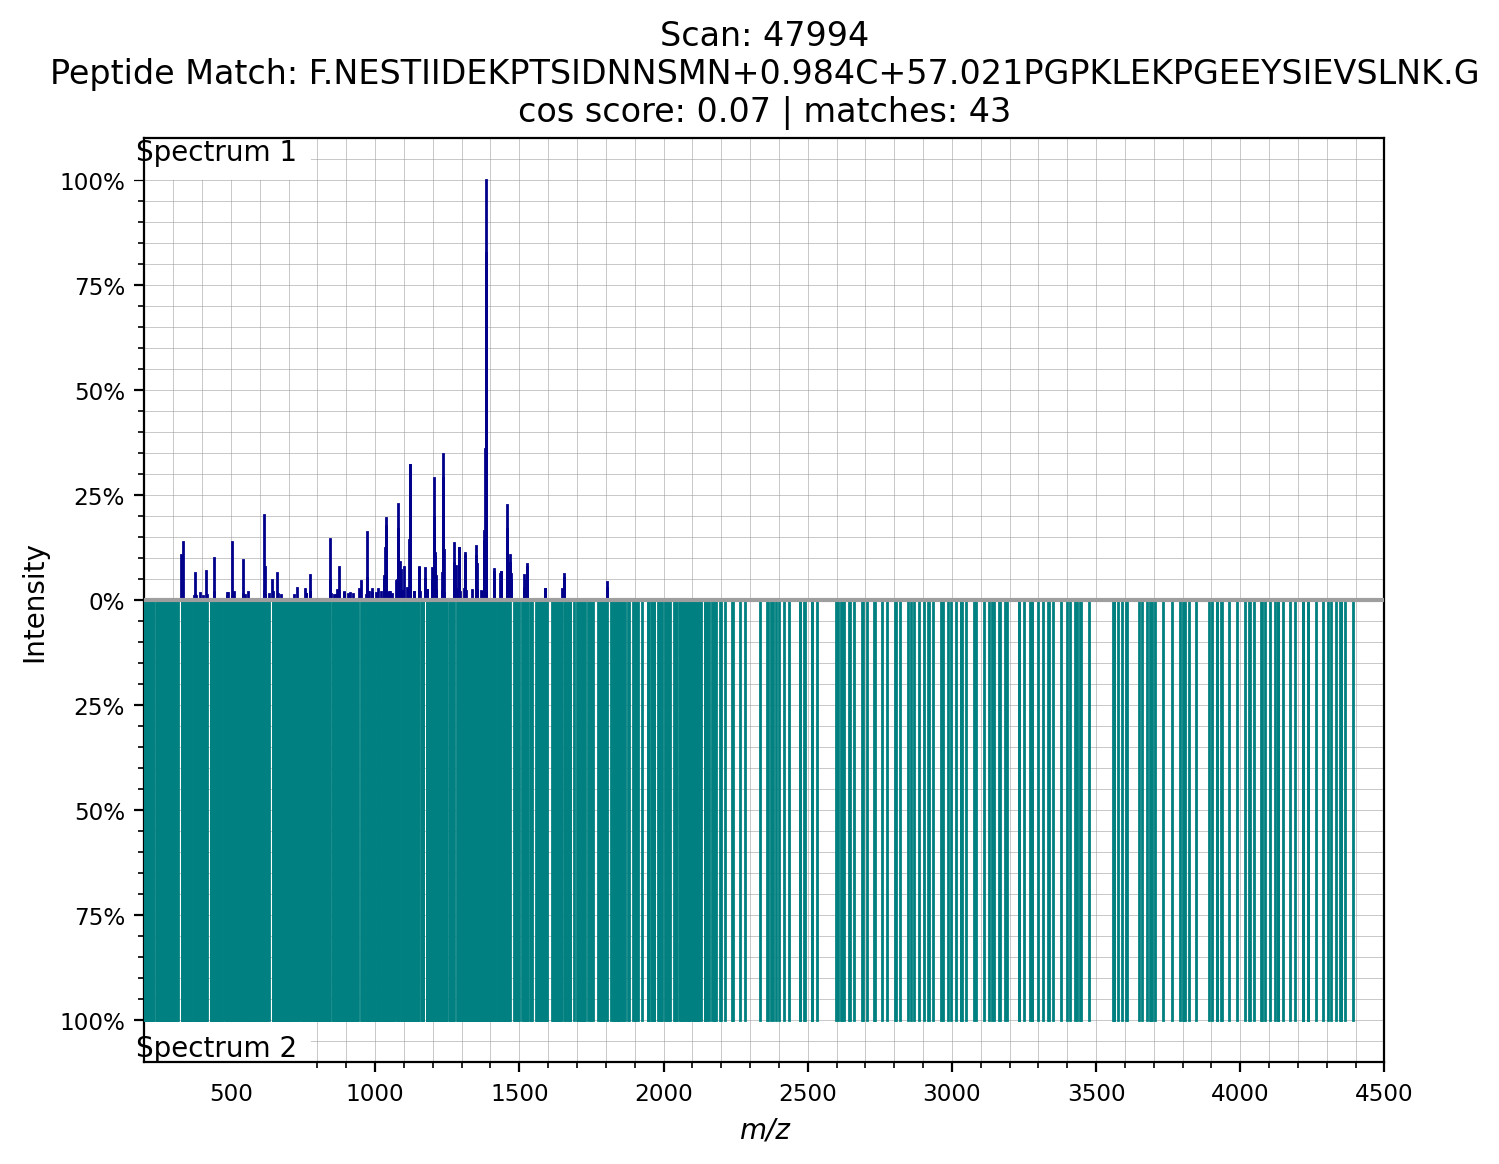

2023-05-26 16:19:10,482:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


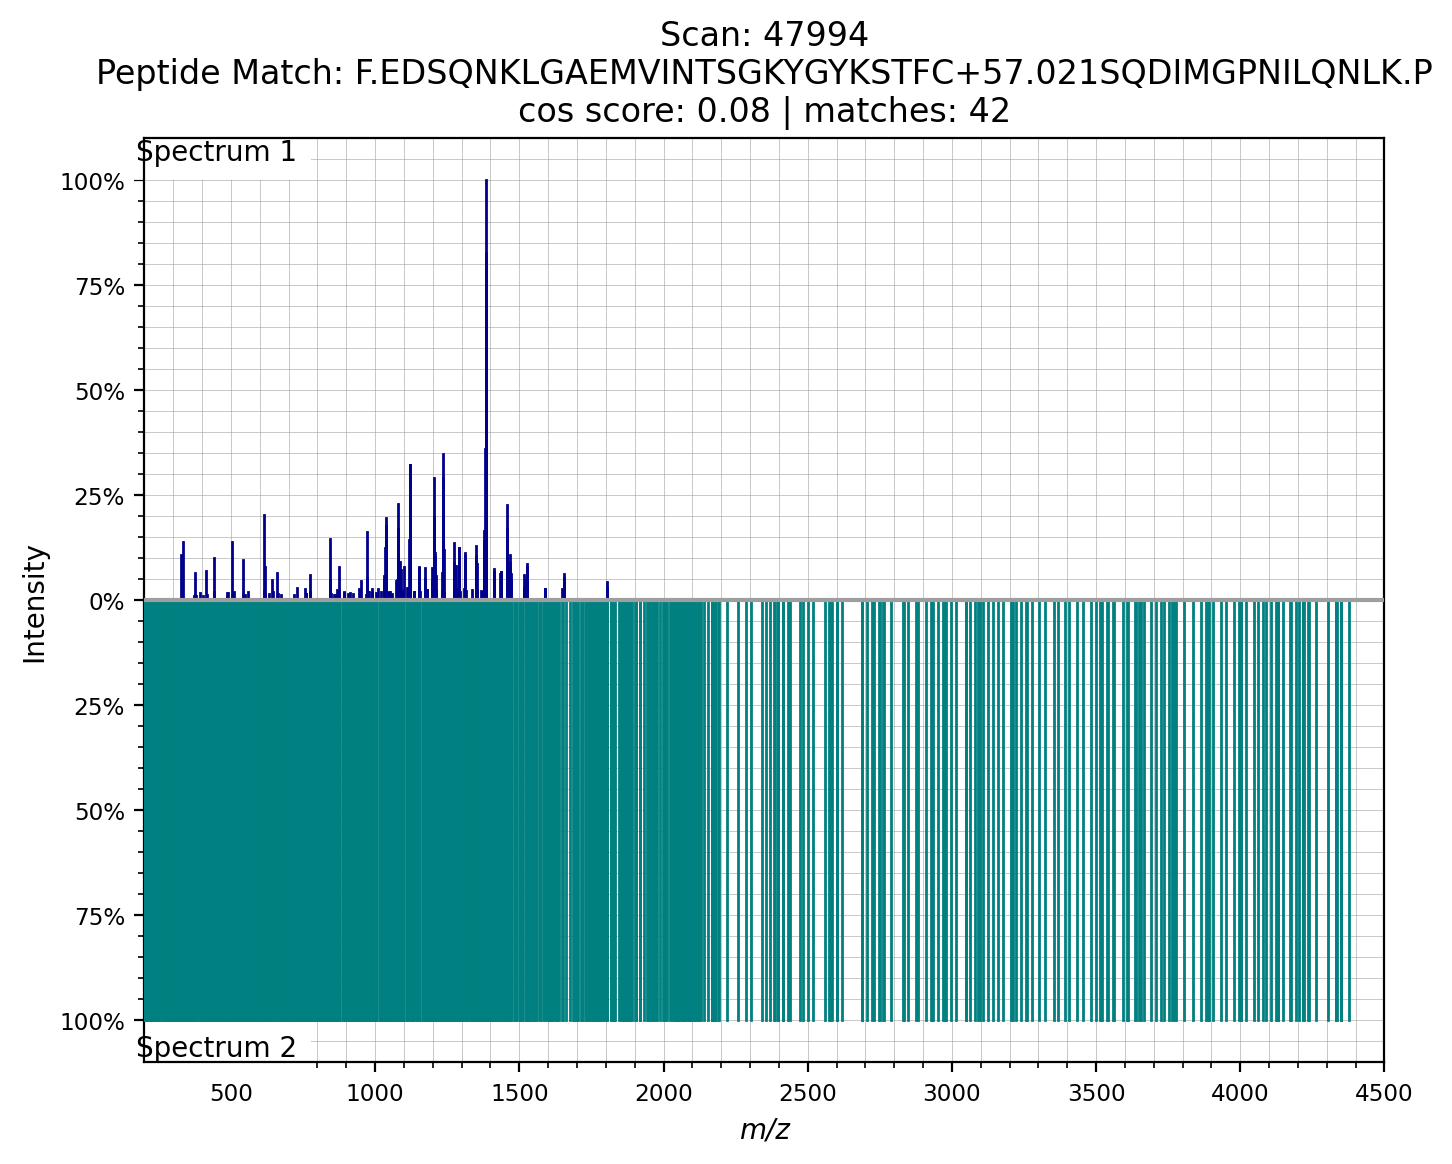

2023-05-26 16:19:13,116:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


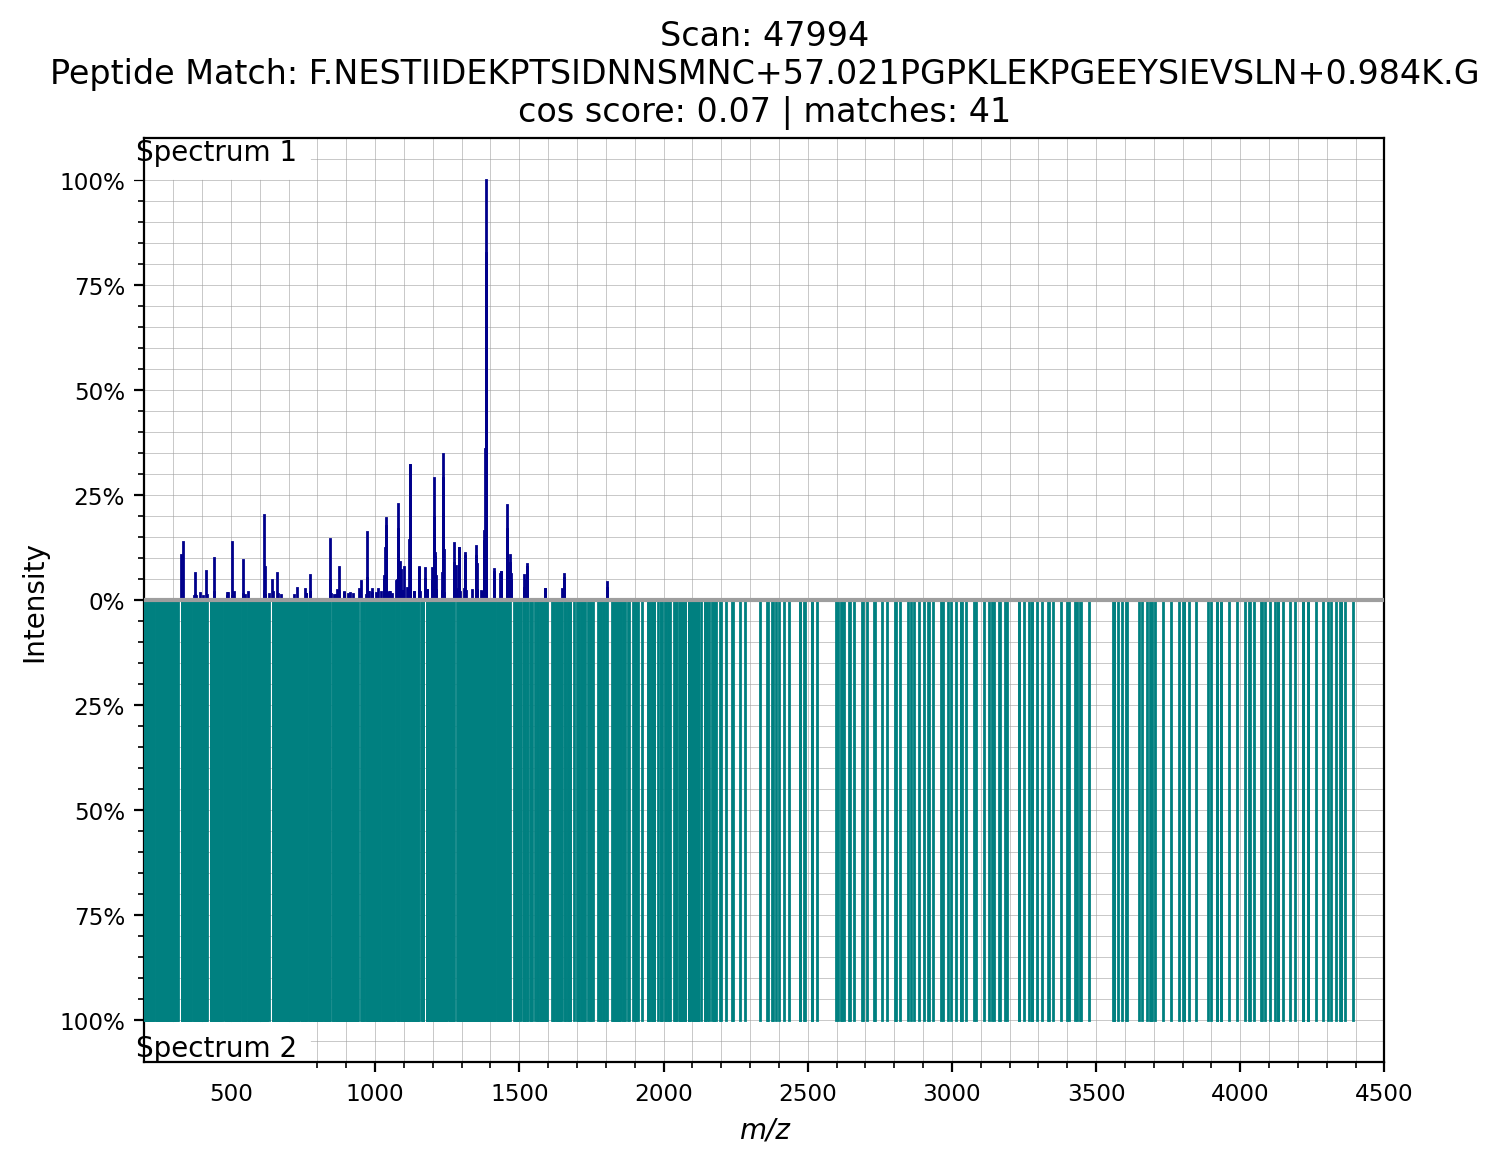

In [19]:
scan_num = 47994

# Actual spectrum for the scan
mz_actual = train_spectrums['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']
intensity_actual = train_spectrums['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['intensity_arr']

mz_actual = np.array([float(x) for x in mz_actual])
intensity_actual = np.array([float(x) for x in intensity_actual])

spectrum_actual = Spectrum(mz=mz_actual,
                    intensities=intensity_actual,
                    metadata={'id': 'theospec'})

# For given scan, get all the peptide matches
peptide_matches = meta['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['Peptide']

# For each peptide match, get the theo spec
for peptide in peptide_matches:
    mz_theo = theospecs[peptide]['mz_arr']
    intensity_theo = theospecs[peptide]['intensity_arr']

    mz_theo = np.array([float(x) for x in mz_theo])
    intensity_theo = np.array([float(x) for x in intensity_theo])

    spectrum_theo = Spectrum(mz=mz_theo,
                    intensities=intensity_theo,
                    metadata={'id': 'theospec'})

    # Calculate cosine similarity between the 2 spectra
    cosine_greedy = CosineGreedy(tolerance=0.2)
    score = cosine_greedy.pair(spectrum_actual, spectrum_theo) 

    spectrum_actual.plot_against(spectrum_theo)
    plt.title(f"Scan: {scan_num}\nPeptide Match: {peptide}\ncos score: {score['score']:.2f} | matches: {score['matches']}")
    plt.show()